# Machine Learning - Final Project
## Accident Severity Prediction
**Team**: *Jennifer Lord, Konstantinos Georgiou, Russ Limber, Sanjeev Singh, Sara Howard*

## Where to put the code
- Place the preprocessing functions/classes in [\<project root\>/project_libs/project/preprocessing.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/preprocessing.py)
- The models in [\<project root\>/project_libs/project/models.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/models.py)
- Any plotting related functions in [\<project root\>/project_libs/project/plotter.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/plotter.py)


**The code is reloaded automatically. Any class object needs to reinitialized though.** 

## Config file
The yml/config file is located at: [confs/prototype1.yml](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/confs/prototype1.yml)<br>
To load it run:
```python
config_path='confs/prototype1.yml'
conf = Configuration(config_src=config_path)
# Get the dataset loader config
loader_config = conf.get_config('data_loader')['config']['dataset'] # type = Dict
print(books.keys())
print(loader_config['url'])
```
To reload the config just run the 2nd and 3rd command.

## Libraries Overview:
All the libraries are located under *"\<project root>/project_libs"*
- project_libs/**project**: This project's code (imported later)
- project_libs/**configuration**: Class that creates config objects from yml files
- project_libs/**fancy_logger**: Logger that can be used instead of prints for text formatting (color, bold, underline etc)

## For more info check out:
- the **[Project Board](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/projects/1)**
- and the **[Current Issues](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/issues)**

# ------------------------------------------------------------------

## On Google Collab?
- **If yes, run the two cells and press the two buttons below:**
- Otherwise go to "***Import the base Libraries***"

In [1]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
# Clone the repository if you're in Google Collab
def clone_project(is_collab: bool = False):
    print("Cloning Project..")
    !git clone https://github.com/UTK-ML-Dream-Team/accident-severity-prediction.git
    print("Project cloned.")
       
print("Clone project?")
print("(If you do this you will ovewrite local changes on other files e.g. configs)")
print("Not needed if you're not on Google Collab")
btn = widgets.Button(description="Yes, clone")
btn.on_click(clone_project)
display(btn)

Clone project?
(If you do this you will ovewrite local changes on other files e.g. configs)
Not needed if you're not on Google Collab


Button(description='Yes, clone', style=ButtonStyle())

In [2]:
# Clone the repository if you're in Google Collab
def change_dir(is_collab: bool = False):
    try:
        print("Changing dir..")
        os.chdir('/content/accident-severity-prediction')
        print('done')
        print("Current dir:")
        print(os.getcwd())
        print("Dir Contents:")
        print(os.listdir())
        print("\nInstalling Requirements")
        !pip install -r requirements.txt
    except Exception:
        print("Error: Project not cloned")
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

### To commit and push Google Collab notebook to Github
Click **File > Save a copy on Gihtub**

# ------------------------------------------------------------------

# Initializations

## Import the base Libraries

In [3]:
# Imports
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['png']
from importlib import reload as reload_lib
from typing import *
import os
import re
from pprint import pprint
import datetime 
import time
from tqdm.notebook import tqdm as tqdm_nb
from tqdm import tqdm
# Numpy
import numpy as np
import pandas as pd
# Import preprocessing lib
from project_libs.project import *

## Load the YML file

In [4]:
from project_libs import Configuration

In [5]:
# The path of configuration and log save path
config_path = "confs/prototype1.yml"
# !cat "$config_path"
# Load the configuratåion
conf = Configuration(config_src=config_path)
# Get the books dict
loader_config = conf.get_config('data_loader')['config']['dataset']
preprocessing_config = conf.get_config('data_loader')['config']['preprocessing']
# print(books.keys())
# pprint(books)  # Pretty print the books dict

2021-12-03 10:45:28 Config       INFO     Configuration file loaded successfully from path: C:\Users\russ_\OneDrive\Desktop\accident-severity-prediction\confs\prototype1.yml
2021-12-03 10:45:28 Config       INFO     Configuration Tag: prototype_1


# ------------------------------------------------------------------

# Start of Project Code

In [6]:
from project_libs import project as proj

## Data Loading

In [9]:
# Download Dataset again if requested
should_download = loader_config['download']
if should_download:
    kaggle_dataset_name = loader_config['kaggle_dataset_name']
    !pip install "kaggle>=1.5.12"
    !mkdir ~/.kaggle
    !cp confs/kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !mkdir data
    !cd data && test -f "US_Accidents_Dec20_updated.csv" || kaggle datasets download -d $kaggle_dataset_name && unzip -o us-accidents.zip && rm us-accidents.zip

mkdir: /Users/gkos/.kaggle: File exists
mkdir: data: File exists
unzip:  cannot find or open us-accidents.zip, us-accidents.zip.zip or us-accidents.zip.ZIP.


In [10]:
# Load Dataset
accidents_df_original = pd.read_csv(loader_config['local_dataset_name'])
accidents_df = accidents_df_original.copy()

## Exploration

### Sampling Tests

In [6]:
# Print Basic Info
print(f"Number of rows: {accidents_df.shape[0]}")
print(f"Number of Columns: {accidents_df.shape[1]}")
print(f"Columns: {accidents_df.columns}")

Number of rows: 1516064
Number of Columns: 47
Columns: Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [7]:
# -- Filter By Cities -- #
print("Unique Cities: ")
cities = accidents_df.City.unique().tolist()
print(f"{cities[:10]}, ..")
print(f"Number of cities: {len(cities)}")
print("----------------------------------------------------")

# Try different number of cities filters
for num_cities in [20, 50, 100, 500, 1000, 1500, 2000]:
    current_num = accidents_df[accidents_df.City.isin(cities[:num_cities])].shape[0]
    print(f"Number of rows when only FIRST {num_cities} were included: {current_num}")

Unique Cities: 
['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg', 'Batavia', 'Cleveland', 'Lima', 'Westerville', 'Jamestown'], ..
Number of cities: 10658
----------------------------------------------------
Number of rows when only FIRST 20 were included: 28208
Number of rows when only FIRST 50 were included: 49824
Number of rows when only FIRST 100 were included: 62172
Number of rows when only FIRST 500 were included: 279012
Number of rows when only FIRST 1000 were included: 693738
Number of rows when only FIRST 1500 were included: 775703
Number of rows when only FIRST 2000 were included: 1037886


In [9]:
# -- Filter By Date -- #
accidents_df.loc[:, 'Start_Time_dt'] = pd.to_datetime(accidents_df.Start_Time)
print(f"Earliest date: {accidents_df.Start_Time_dt.min()}")
print(f"Most Recent date: {accidents_df.Start_Time_dt.max()}")
print("----------------------------------------------------")

# Try different date filters
dates = [(2017, 1), (2018, 1), (2019, 1), (2020, 1), (2020, 6), (2020, 9)]
for year, month in dates:
    condition = accidents_df.Start_Time_dt.dt.date>=datetime.date(year=year,month=month,day=1)
    current_num = accidents_df.Start_Time_dt[condition].shape[0]
    print(f"Number of rows when only dates STARTED FROM {month}/{year} were included: {current_num}")


Earliest date: 2016-02-08 00:37:08
Most Recent date: 2020-12-31 23:28:56
----------------------------------------------------
Number of rows when only dates STARTED FROM 1/2017 were included: 1386739
Number of rows when only dates STARTED FROM 1/2018 were included: 1216640
Number of rows when only dates STARTED FROM 1/2019 were included: 1049704
Number of rows when only dates STARTED FROM 1/2020 were included: 787932
Number of rows when only dates STARTED FROM 6/2020 were included: 546313
Number of rows when only dates STARTED FROM 9/2020 were included: 480503


In [10]:
# -- Filter By States and Date -- #
print("Unique States: ")
states = accidents_df.State.unique().tolist()
print(states[:10])
print(f"Number of states: {len(states)}")
print("----------------------------------------------------")

# Filter By NE States
staes_of_choice =  ['PA', 'NY', 'VY', 'ME', 'NH', 'MA', 'RI', 'CT', 'NJ', 'DE', 'DC', 'MD']
accidents_df_filtered = accidents_df[accidents_df.State.isin(staes_of_choice)].copy()
print(f"Number of rows when only North Eastern states were included: {accidents_df_filtered.shape[0]}")

# By Date
year, month = 2020, 1
condition = accidents_df_filtered.Start_Time_dt.dt.date>=datetime.date(year=year,month=month,day=1)
current_num = accidents_df_filtered.Start_Time_dt[condition].shape[0]
print(f"Number of rows when only dates STARTED FROM {month}/{year} for the North Easter States were included: {current_num}")

Unique States: 
['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX']
Number of states: 49
----------------------------------------------------
Number of rows when only North Eastern states were included: 206216
Number of rows when only dates STARTED FROM 1/2020 for the North Easter States were included: 114565


### Correlation between features

In [ ]:
from project_libs.project import plotter as pl

['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


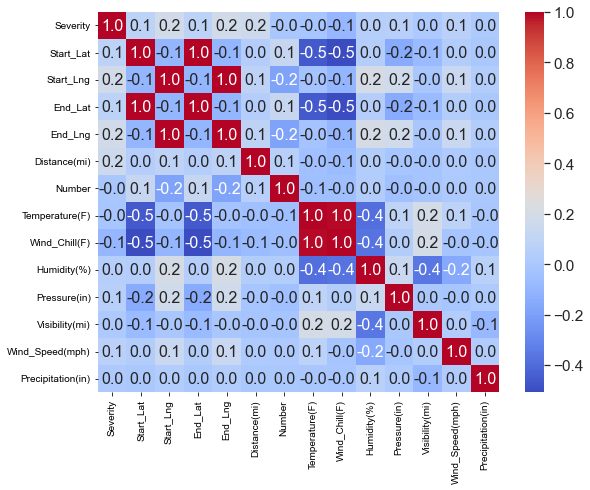

In [9]:
# Find Correlations between columns
cols_to_visualize = list(accidents_df_original.describe().columns)
print(cols_to_visualize)
pl.viz_columns_corr(accidents_df_original, cols_to_visualize)

## Preprocessing

In [11]:
from project_libs.project import preprocessing as pre

In [12]:
# Create a copy of the df
accidents_df_isolated = accidents_df_original.copy()

# Isolate city state
city_list = preprocessing_config['city_list']
state_list = preprocessing_config['state_list']
accidents_df_isolated = pre.isolate_city_state(accidents_df_isolated, city_list, state_list)
display(accidents_df_isolated)

ID  Severity           Start_Time             End_Time  \
98138    A-2814738         3  2016-11-30 15:01:56  2016-11-30 21:01:56   
98139    A-2814739         2  2016-11-30 15:19:52  2016-11-30 21:19:52   
98141    A-2814741         2  2016-11-30 17:05:39  2016-11-30 23:05:39   
98142    A-2814742         2  2016-11-30 17:10:37  2016-11-30 23:10:37   
98146    A-2814746         2  2016-11-30 18:28:58  2016-12-01 00:28:58   
...            ...       ...                  ...                  ...   
1515761  A-4239104         3  2019-08-23 16:58:31  2019-08-23 17:26:11   
1515762  A-4239105         3  2019-08-23 16:03:57  2019-08-23 16:33:31   
1515763  A-4239106         3  2019-08-23 16:03:57  2019-08-23 16:33:31   
1515764  A-4239107         3  2019-08-23 16:03:57  2019-08-23 16:33:31   
1515776  A-4239119         3  2019-08-23 20:54:19  2019-08-23 21:23:54   

         Start_Lat   Start_Lng   End_Lat    End_Lng  Distance(mi)  \
98138    33.662770 -111.999580  33.66622 -111.99952         0.238   
98139    33.668760 -112.072750  33.66898 -112.05849         0.820   
98141    33.484250 -112.113190  33.47491 -112.11320         0.645   
98142    33.295215 -111.972420  33.28853 -111.97132         0.466   
98146    33.461900 -112.092145  33.46190 -112.09904         0.397   
...            ...         ...       ...        ...           ...   
1515761  41.815300  -87.630480  41.81212  -87.63042         0.220   
1515762  41.715130  -87.630040  41.71499  -87.63090         0.045   
1515763  41.943350  -87.716690  41.94859  -87.72162         0.442   
1515764  41.718620  -87.625210  41.71513  -87.63004         0.347   
1515776  41.783460  -87.630600  41.79887  -87.63087         1.065   

                                               Description  ...  Roundabout  \
98138                   At AZ-101-LOOP/Exit 15 - Accident.  ...       False   
98139                        At 7th St/Exit 26 - Accident.  ...       False   
98141                    At Thomas Rd/Exit 201 - Accident.  ...       False   
98142                At Chandler Blvd/Exit 160 - Accident.  ...       False   
98146                    At 19th Ave/Exit 143C - Accident.  ...       False   
...                                                    ...  ...         ...   
1515761                    At 47th St/Exit 56B - Accident.  ...       False   
1515762    At I-57/Exit 63 - Accident. unconfirmed report.  ...       False   
1515763                 At Addison St/Exit 45A - Accident.  ...       False   
1515764  Ramp to I-57 Southbound - Accident. unconfirme...  ...       False   
1515776  Between 59th St/Exit 58A and Garfield Blvd/Exi...  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
98138     False  False           False          False        False   
98139     False  False           False          False        False   
98141     False  False           False          False        False   
98142     False  False           False          False        False   
98146     False  False           False          False        False   
...         ...    ...             ...            ...          ...   
1515761   False  False           False          False        False   
1515762   False  False           False          False        False   
1515763   False  False           False          False        False   
1515764   False  False           False          False        False   
1515776   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
98138              Day            Day               Day                   Day  
98139              Day            Day               Day                   Day  
98141              Day            Day               Day                   Day  
98142              Day            Day               Day                   Day  
98146            Night          Night             Night                   Day  
...                ...      

In [13]:
### --- Russ's Code --- ###

# Create a copy of the df
accidents_df_russ = accidents_df_isolated.copy()

env_vars = preprocessing_config['env_vars']
accidents_df_russ = pre.subset_df(accidents_df_russ, env_vars)

print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))

temp_wind = pre.subset_df(accidents_df_russ, ['Temperature(F)', 'Wind_Speed(mph)'])
pre.OLS(temp_wind, np.array(accidents_df_russ['Wind_Chill(F)']))

accidents_df_russ["Wind_Temp"] = accidents_df_russ['Wind_Chill(F)'].fillna((accidents_df_russ['Temperature(F)']*1.0178 - accidents_df_russ['Wind_Speed(mph)']*0.3023))

print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))
accidents_df_russ.drop("Wind_Chill(F)", axis=1)

accidents_df_russ = pre.knn_imputer(accidents_df_russ, 3)
accidents_df_russ = pre.basic_impute(accidents_df_russ)

#print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))


2021-12-08 12:28:57 Preprocessing INFO                                      OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.042e+07
Date:                Wed, 08 Dec 2021   Prob (F-statistic):                        0.00
Time:                        12:28:57   Log-Likelihood:                     -1.2984e+05
No. Observations:               56661   AIC:                                  2.597e+05
Df Residuals:                   56659   BIC:                                  2.597e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      

Percent of missing rows by column 

 Weather_Timestamp        0.007985
Temperature(F)           0.010175
Wind_Chill(F)            0.373365
Humidity(%)              0.010639
Pressure(in)             0.010352
Visibility(mi)           0.009920
Wind_Direction           0.017584
Wind_Speed(mph)          0.103427
Precipitation(in)        0.376229
Weather_Condition        0.009721
Sunrise_Sunset           0.000000
Civil_Twilight           0.000000
Nautical_Twilight        0.000000
Astronomical_Twilight    0.000000
dtype: float64
Percent of missing rows by column 

 Weather_Timestamp        0.007985
Temperature(F)           0.010175
Wind_Chill(F)            0.373365
Humidity(%)              0.010639
Pressure(in)             0.010352
Visibility(mi)           0.009920
Wind_Direction           0.017584
Wind_Speed(mph)          0.103427
Precipitation(in)        0.376229
Weather_Condition        0.009721
Sunrise_Sunset           0.000000
Civil_Twilight           0.000000
Nautical_Twilight        0.

In [14]:
### --- Sanjeev's Code --- ###

# Create a copy of the df
accidents_df_sanjeev = accidents_df_isolated.copy()

# Filter the infra variables
infra_vars = preprocessing_config['infra_vars']
accidents_df_infra = accidents_df_isolated[infra_vars].copy()

# Filter location and basic variables
accidents_df_sanjeev = pre.filter_loc_basic_var(accidents_df_sanjeev)

# Combine all Russ, Sanjeev, and Infra DF
X_raw = pd.concat([accidents_df_russ, accidents_df_sanjeev, accidents_df_infra], axis=1)
X_raw_ = X_raw.copy()
print('X_raw: Number of missing rows by column', '\n', X_raw.isnull().sum())

# Standardize, Encode, Extract and Split Train/Test
X_train, X_val, X_test, y_train, y_val, y_test = encode_std_extract_split(X_raw_)

X_raw: Number of missing rows by column 
 Weather_Timestamp          722
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction            1590
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition          879
Sunrise_Sunset               0
Civil_Twilight               0
Nautical_Twilight            0
Astronomical_Twilight        0
Wind_Temp                    0
ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Distance(mi)                 0
Description                  0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Number                   67960
Street                       0
Side                         0
City                         0
County                       0
State                       




### PCA

In [15]:
### --- Kostas's Code --- ###

# Create a copy of the dfs
X_train_PCA = X_train.copy()
X_val_PCA = X_val.copy()
X_test_PCA = X_test.copy()

# Retrieve Numerical Columns
numerical_cols = X_train_PCA.describe().columns
print("Number of columns to reduce using PCA (only numerical ones): ", len(numerical_cols))

# Check for Nulls
print("\nNull values per column:")
print(X_train_PCA[numerical_cols].isna().sum())

# Export to Numpy
X_train_PCA_np = X_train_PCA[numerical_cols].to_numpy()
X_val_PCA_np = X_val_PCA[numerical_cols].to_numpy()
X_test_PCA_np = X_test_PCA[numerical_cols].to_numpy()
print("\nType of exported Numpy array: ", X_train_PCA_np.dtype)

# Run PCA
pca = pre.PCA()
pca.fit(data=X_train_PCA_np, max_error=0.01)
X_train_PCA_np = pca.transform(data=X_train_PCA_np)
X_val_PCA_np = pca.transform(data=X_val_PCA_np)
X_test_PCA_np = pca.transform(data=X_test_PCA_np)

# Drop the reduces columns from DF
X_train_PCA = X_train_PCA.drop(numerical_cols, axis=1)
X_val_PCA = X_val_PCA.drop(numerical_cols, axis=1)
X_test_PCA = X_test_PCA.drop(numerical_cols, axis=1)

# Add the new (reduced) columns to the Dataframe
num_new_cols = X_train_PCA_np.shape[1]
new_col_names = [f"PCA_{ind}" for ind in range(num_new_cols)]
X_train_PCA[new_col_names] = X_train_PCA_np
X_val_PCA[new_col_names] = X_val_PCA_np
X_test_PCA[new_col_names] = X_test_PCA_np

# Print New columns
print("\nNumber of columns (after PCA): ", len(X_train_PCA.describe().columns))
print("\nColumns: ", X_train_PCA.columns)

2021-12-08 12:32:06 Preprocessing INFO     For # dims=15 error=0.009648036067527399 <= 0.01


Number of columns to reduce using PCA (only numerical ones):  142

Null values per column:
Temperature(F)                              0
Wind_Chill(F)                               0
Humidity(%)                                 0
Pressure(in)                                0
Visibility(mi)                              0
                                           ..
Weather_Condition_Thunderstorm              0
Weather_Condition_Thunderstorms and Rain    0
Weather_Condition_Widespread Dust           0
Weather_Condition_Wintry Mix                0
Weather_Condition_Wintry Mix / Windy        0
Length: 142, dtype: int64

Type of exported Numpy array:  float64

Number of columns (after PCA):  16

Columns:  Index(['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7',
       'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14',
       'PCA_15'],
      dtype='object')


## Prepare Models

In [16]:
from project_libs.project import models

In [17]:
# Export to Numpy
# Train set PCA and non-PCA
X_train_PCA_np = X_train_PCA.to_numpy()
X_train_PCA_TVT = X_train_PCA.loc[:, X_train_PCA.columns!='PCA_15'].copy().reset_index(drop=True)
X_train_PCA_TVT_np = X_train_PCA_TVT.to_numpy()
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
y_train_onehot_np = pre.one_hot_encode(y_train_np)
# Test set PCA and non-PCA
X_test_PCA_np = X_test_PCA.to_numpy()
X_test_PCA_TVT = X_test_PCA.loc[:, X_test_PCA.columns!='PCA_15'].copy().reset_index(drop=True)
X_test_PCA_TVT_np = X_test_PCA_TVT.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()
y_test_onehot_np = pre.one_hot_encode(y_test_np)
# Validation set PCA and non-PCA
X_val_PCA_np = X_val_PCA.to_numpy()
X_val_PCA_TVT = X_val_PCA.loc[:, X_val_PCA.columns!='PCA_15'].copy().reset_index(drop=True)
X_val_PCA_TVT_np = X_val_PCA_TVT.to_numpy()
X_val_np = X_val.to_numpy()
y_val_np = y_val.to_numpy()
y_val_onehot_np = pre.one_hot_encode(y_val_np)
# Unique classes
num_classes = np.unique(y_train_np).astype(int).shape[0]

## Chi Square - Test of Homogeneity

In [18]:
accident_data_chisquared = copy.copy(accidents_df_isolated)
accident_data_chisquared['Severity'] = accident_data_chisquared['Severity'].ge(3).astype(int) 

print(accident_data_chisquared[['Severity', 'City']].groupby(['City']).sum())

severe_accidents = np.array(accident_data_chisquared[['Severity', 'City']].groupby(['City']).sum()).reshape(1, -1)
freq = np.array(accident_data_chisquared[['ID', 'City']].groupby(['City']).count()).reshape(1, -1)

observered1 = copy.copy(severe_accidents)
observered0 = freq - severe_accidents

expected1 = (observered1.sum()*freq)/len(accident_data_chisquared)
expected0 = (observered0.sum()*freq)/len(accident_data_chisquared)

chisquare(f_obs = observered1.T, f_exp = expected1.T)

              Severity
City                  
Chicago           7654
Houston           6769
Los Angeles       2736
New York          1225
Philadelphia       739
Phoenix           1642


Power_divergenceResult(statistic=array([15138.3706023]), pvalue=array([0.]))

Given by the very low p-value above, we can conclude that there is a difference in the ratio of severe accidents to all accidents by city.

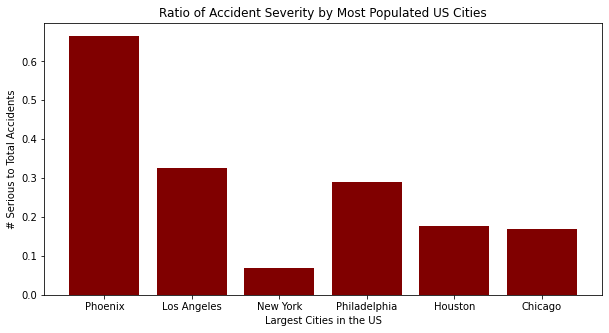

In [19]:
ratio_of_severe_accidents = observered1/freq

plt.figure(figsize = (10, 5))
cities = list(accident_data_chisquared['City'].unique())

plt.bar(cities, ratio_of_severe_accidents[0].tolist(), color = 'maroon')
 
plt.xlabel("Largest Cities in the US")
plt.ylabel("# Serious to Total Accidents")
plt.title("Ratio of Accident Severity by Most Populated US Cities")
plt.show()

## Hyperparameter Tuning

### 1. Tune KMeans

In [69]:
distances = ['cityblock', 'correlation', 'cosine','euclidean','mahalanobis']
# distances = ['cityblock', 'correlation', 'cosine','euclidean']

# Prepare Training Data
X_train_PCA_TVT = X_train_PCA.loc[:, X_train_PCA.columns!='PCA_15'].copy()
X_train_PCA_TVT.reset_index(drop=True)
X_train_PCA_TVT = X_train_PCA_TVT.to_numpy()

X_train_all = X_train.copy()
X_train_all.reset_index(drop=True)
X_train_all = X_train_all.to_numpy()

# Prepare Validation Data
X_val_PCA_TVT = X_val_PCA.loc[:, X_val_PCA.columns!='PCA_15'].copy()
X_val_PCA_TVT.reset_index(drop=True)
X_val_PCA_TVT = X_val_PCA_TVT.to_numpy()

X_val_all = X_val.copy()
X_val_all.reset_index(drop=True)
X_val_all = X_val_all.to_numpy()

print("======================================")
print(f"\033[1mKMeans Tuning Results \033[0m")
print("======================================")
# Compute overall accuracy on validation dataset
for d in distances:
    km = models.kmeans(X_train_PCA_TVT, dist=d)
    km.fit()
    y_pred = km.predict(X_val_PCA_TVT, y_val)
    score = models.accuracy_score(y_val, y_pred)
    print(f"Distance Function: {d} \t Overall Accuracy: {round(100*score, 2)} %")

# ======================================
# KMeans Tuning Results on Full Data
# ======================================
# Distance Function: cityblock 	 Overall Accuracy: 57.5 %
# Distance Function: correlation 	 Overall Accuracy: 77.46 %
# Distance Function: cosine 	 Overall Accuracy: 77.46 %
# Distance Function: euclidean 	 Overall Accuracy: 58.94 %

KMeans Tuning Results 
Distance Function: cityblock 	 Overall Accuracy: 57.45 %
Distance Function: correlation 	 Overall Accuracy: 60.74 %
Distance Function: cosine 	 Overall Accuracy: 60.76 %
Distance Function: euclidean 	 Overall Accuracy: 58.94 %
Distance Function: mahalanobis 	 Overall Accuracy: 58.48 %


In [70]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
d = {'Distance': ['cityblock', 'correlation', 'cosine','euclidean','mahalanobis'], 
     'Accuracy': [57.45, 60.74, 60.76, 58.94, 58.48]}
kmt_df = pd.DataFrame(data=d)
fig = px.bar(kmt_df, x='Distance', y='Accuracy', text='Accuracy', 
             labels={"Accuracy": "Accuracy (%)"})
fig.update_layout(
    autosize=False,
    width=600,
    height=500,
    title={
        'text': "Tuning K-means on Validation Dataset",
        'y':0.95,
        'x':0.5,
        'font': {'size': 16},
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### 2. Tune SVM

In [ ]:
# parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'gamma':['NA']}]

print("======================================")
print(f"\033[1mSVM Tuning Results \033[0m")
print("======================================")
for param in parameters:
    for k in param['kernel']:
        for g in param['gamma']:
            for c in param['C']:
                if g != 'NA':
                    clf = models.SVC(C=c, kernel=k, gamma=g)
                else:
                    clf = models.SVC(C=c, kernel=k)
                    
                clf.fit(X_train_PCA_TVT, y_train)
                y_pred = clf.predict(X_val_PCA_TVT)
                score = models.accuracy_score(y_val, y_pred)
                f1_s = models.f1_score(y_val, y_pred)
                print(f"Kernel: {k} \t Gamma: {g} \t C: {c} \t Accuracy: {round(100*score, 2)}% \t F1 Score: {f1_s}")
                
# ======================================
# SVM Tuning Results on PCA Data
# ======================================
# Kernel: rbf 	 Gamma: 0.001 	 C: 1      Accuracy: 81.49 %
# Kernel: rbf 	 Gamma: 0.001 	 C: 10     Accuracy: 81.61 %
# Kernel: rbf 	 Gamma: 0.001 	 C: 100    Accuracy: 81.70 %
# Kernel: rbf 	 Gamma: 0.001 	 C: 1000   Accuracy: 82.16 %
# Kernel: rbf 	 Gamma: 0.0001 	 C: 1      Accuracy: 81.51 %
# Kernel: rbf 	 Gamma: 0.0001 	 C: 10     Accuracy: 81.51 %
# Kernel: rbf 	 Gamma: 0.0001 	 C: 100    Accuracy: 81.56 %
# Kernel: rbf 	 Gamma: 0.0001 	 C: 1000   Accuracy: 81.62 %
# Kernel: linear 	 Gamma: NA 	 C: 1 	 Accuracy: 81.51% F1 Score: 0.48009950248756217
# Kernel: linear 	 Gamma: NA 	 C: 10 	 Accuracy: 81.51% F1 Score: 0.48009950248756217
# Kernel: linear 	 Gamma: NA 	 C: 100 	 Accuracy: 81.31% F1 Score: 0.47121401752190245
# Kernel: linear 	 Gamma: NA 	 C: 1000 	 Accuracy: 80.99% F1 Score: 0.45687203791469194

### 3. Tune Bayesian

In [ ]:
# Construct Hyperparameters
create_priors = lambda priors: (priors/priors.sum()).tolist()
priors_list = [create_priors(np.random.uniform(0, 1, num_classes)) for _ in range(100)]
cases = ( 
         "mahalanobis", 
         "quadratic",
         "euclidean")
data = (
        ("non-PCA val dataset", X_val_np, y_val_np),
        ("PCA val dataset", X_val_PCA_TVT_np, y_val_np),
        )
# Find optimal hyperapameters
results_1 = {}
results_2 = {}
results_3 = {}
for data_name, x_data, y_data in data:
    # Create model
    bayesian_case = models.BayesianCase(train_x=x_data, train_y=y_data, 
                                        test_x=x_data, test_y=y_data)
    bayesian_case.fit()
    priors_iter = tqdm(list(enumerate(priors_list)))
    for ind, priors in priors_iter:
        for i_case, case in enumerate(cases):
            print_name = f"{data_name} - priors({priors[0]:.4f} , {priors[1]:.4f}) - {case}"
            priors_iter.set_description(print_name)
            bayesian_case.predict(mtype=case, priors=priors)
            accuracy, classwise_accuracy, prediction_time = bayesian_case.get_statistics(case)
            tp, fn, fp, tn = bayesian_case.get_confusion_matrix(case)
            if i_case == 0:
                results_1[print_name] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
            elif i_case == 1:
                results_2[print_name] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
            elif i_case == 2:
                results_3[print_name] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)

print(f"Tested {len(data)*len(priors_list)*len(cases)} hyperparameters.")

non-PCA val dataset - priors(0.1019 , 0.8981) - quadratic:   0%|          | 0/100 [02:18<?, ?it/s]  /content/accident-severity-prediction/project_libs/project/models.py:159: RuntimeWarning: invalid value encountered in log
  
non-PCA val dataset - priors(0.1019 , 0.8981) - quadratic:   0%|          | 0/100 [02:18<?, ?it/s]


ValueError: ignored

In [ ]:
for ind, data in enumerate(sorted(results_1.items(), key=lambda items: items[1][0], reverse=True)[:3]):
    print(f"Case 1 - Top {ind+1}: {data[0]}")
    print(f"    Accuracy: {data[1][0]:.4f}, \
          Classwise Accs: ({data[1][1][0]:.4f} , {data[1][1][1]:.4f})")
    print()
for ind, data in enumerate(sorted(results_2.items(), key=lambda items: items[1][0], reverse=True)[:3]):
    print(f"Case 2 - Top {ind+1}: {data[0]}")
    print(f"    Accuracy: {data[1][0]:.4f}, \
          Classwise Accs: ({data[1][1][0]:.4f} , {data[1][1][1]:.4f})")
    print()
for ind, data in enumerate(sorted(results_3.items(), key=lambda items: items[1][0], reverse=True)[:3]):
    print(f"Case 3 - Top {ind+1}: {data[0]}")
    print(f"    Accuracy: {data[1][0]:.4f}, \
          Classwise Accs: ({data[1][1][0]:.4f} , {data[1][1][1]:.4f})")
    print()

_res = \
"""
Case 1 - Top 1: PCA val dataset - priors(0.9848 , 0.0152) - euclidean
    Accuracy: 0.7768,           Classwise Accs: (0.9739 , 0.1156)

Case 1 - Top 2: non-PCA val dataset - priors(0.9848 , 0.0152) - euclidean
    Accuracy: 0.7768,           Classwise Accs: (0.9739 , 0.1156)

Case 1 - Top 3: PCA val dataset - priors(0.9924 , 0.0076) - euclidean
    Accuracy: 0.7754,           Classwise Accs: (0.9832 , 0.0780)

Case 2 - Top 1: PCA val dataset - priors(0.7558 , 0.2442) - mahalanobis
    Accuracy: 0.8162,           Classwise Accs: (0.9159 , 0.4817)

Case 2 - Top 2: non-PCA val dataset - priors(0.7558 , 0.2442) - mahalanobis
    Accuracy: 0.8162,           Classwise Accs: (0.9159 , 0.4817)

Case 2 - Top 3: PCA val dataset - priors(0.7470 , 0.2530) - mahalanobis
    Accuracy: 0.8156,           Classwise Accs: (0.9109 , 0.4961)

Case 3 - Top 1: PCA val dataset - priors(0.9924 , 0.0076) - quadratic
    Accuracy: 0.8133,           Classwise Accs: (0.9509 , 0.3516)

Case 3 - Top 2: non-PCA val dataset - priors(0.9924 , 0.0076) - quadratic
    Accuracy: 0.8133,           Classwise Accs: (0.9509 , 0.3516)

Case 3 - Top 3: PCA val dataset - priors(0.9910 , 0.0090) - quadratic
    Accuracy: 0.8132,           Classwise Accs: (0.9488 , 0.3584)
"""

### 4. Tune BPNN

In [22]:
# Calculate the max recommended number of neurons using the formula:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# 𝑁𝑖 = number of input neurons.
# 𝑁𝑜 = number of output neurons.
# 𝑁𝑠 = number of samples in training data set.
# 𝛼 = an arbitrary scaling factor usually 2-10.
Ni = int(X_train_PCA_TVT_np.shape[1] - 1)
No = int(y_train_onehot_np.shape[1])
Ns = X_train_PCA_TVT_np.shape[0]
a = 2
total_num_neurons = Ns/(a*(Ni+No))
logger.info(f"Max recommended number of hidden neurons to use: {total_num_neurons}", 
            color='grey', on_color="on_red")

# Different hidden neuron configurations
print(f"{757+757+757=}")
print(f"{160+1952+160=}")
print(f"{568+568+568+568=}")
print(f"{288+848+848+288=}")

2021-12-07 00:07:10 Models       INFO     Max recommended number of hidden neurons to use: 2260.5


757+757+757=2271
160+1952+160=2272
568+568+568+568=2272
288+848+848+288=2272


In [82]:
from itertools import product

# Func to create string from list (for creating names)
def join_lst(lst): return '-'.join([str(el) for el in lst])

# Static Hyperparams
loss_functions = ['mse', 'cross_entropy']
symmetric_weights = True
shuffle = True
seed = 3
early_stopping = {"max_accuracy": 0.99, 'wait': 2}
debug = {'epochs': 1, 'batches': 10**10,
         'ff': False, 'bp': False, 'w': False, 'metrics': False}
mlp_models = {}
mlp_accuracies = {}
mlp_losses = {}
mlp_times = {}
# Hyperparams to test
b_size_epochs_loops = (
    (1000, 5),
    (50, 5),
)
reg_loops = (
    0.05,
)
mom_loops = (
    0.00005,
)
lr_loops = (
    0.5,
    0.1,
)
lay_act_loops = (
    # ([757, 757, 757], ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
    # ([160, 1952, 160], ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
    # ([568, 568, 568, 568], ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
    # ([288, 848, 848, 288], ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
    ([160, 544, 848, 544, 160], ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
)
# Create product of all combinations of the hyperparameters
params = list(product(lay_act_loops, lr_loops,
              mom_loops, reg_loops, b_size_epochs_loops))
logger.info(f"Number of Hyperparamater combinations to test: {len(params)}")
# Train on validation set and save results
for ind, (lay_act, lr, mom, reg, b_size_epochs) in enumerate(params):
    logger.nl(3)
    logger.info(f"Hyperparam combination {ind+1}/{len(params)}")
    lay, act = lay_act
    b_size, max_epochs = b_size_epochs
    name = f"lay.{join_lst(lay)}__act.{join_lst(act)}__lr.{lr}__b.{b_size}__mom.{mom}__reg.{reg}"
    try:
      mlp_models[name], mlp_accuracies[name], mlp_losses[name], mlp_times[name] = \
          models.train_bpnn(name, X_val_PCA_TVT_np.copy(), y_val_onehot_np.copy(), lay, act,
                              loss_functions, lr, mom, b_size, early_stopping,
                              max_epochs, reg, shuffle, symmetric_weights, seed, debug)
    except Exception as e:
      print(e)

2021-12-07 12:51:12 Models       INFO     Number of Hyperparamater combinations to test: 4



2021-12-07 12:51:12 Models       INFO     Hyperparam combination 1/4

2021-12-07 12:51:12 Models       INFO     Training lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.1000__mom.5e-05__reg.0.05 dataset..
2021-12-07 12:51:12 Models       INFO     [15, 160, 544, 848, 544, 160, 2]
2021-12-07 12:51:12 Models       INFO     Epoch: 1
2021-12-07 12:52:14 Models       INFO       mse Loss: 3.02849
2021-12-07 12:52:14 Models       INFO       cross_entropy Loss: 3.02894
2021-12-07 12:52:14 Models       INFO       Accuracy: 6972/9042
2021-12-07 12:52:14 Models       INFO     Epoch: 2
2021-12-07 12:53:12 Models       INFO       mse Loss: 3.02659
2021-12-07 12:53:12 Models       INFO       cross_entropy Loss: 3.02783
2021-12-07 12:53:12 Models       INFO       Accuracy: 6974/9042
2021-12-07 12:53:12 Models       INFO     Epoch: 3
2021-12-07 12:54:23 Models       INFO

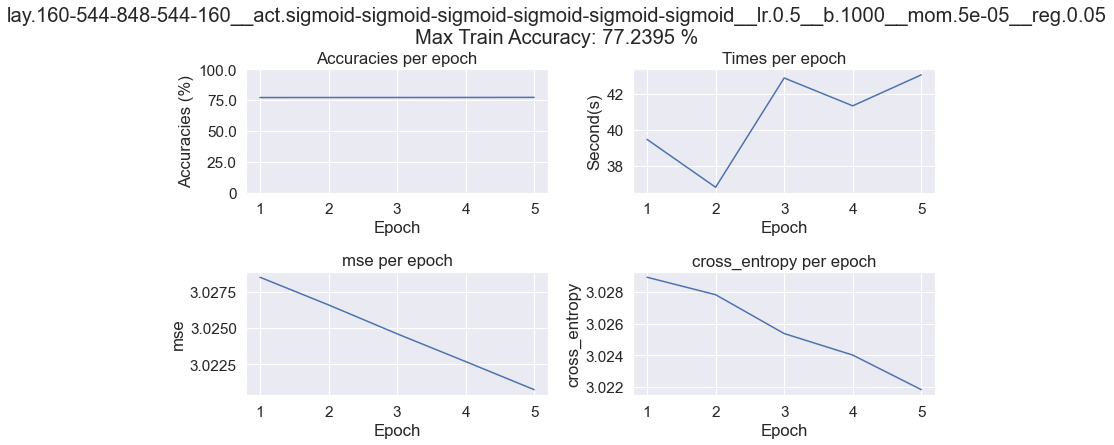

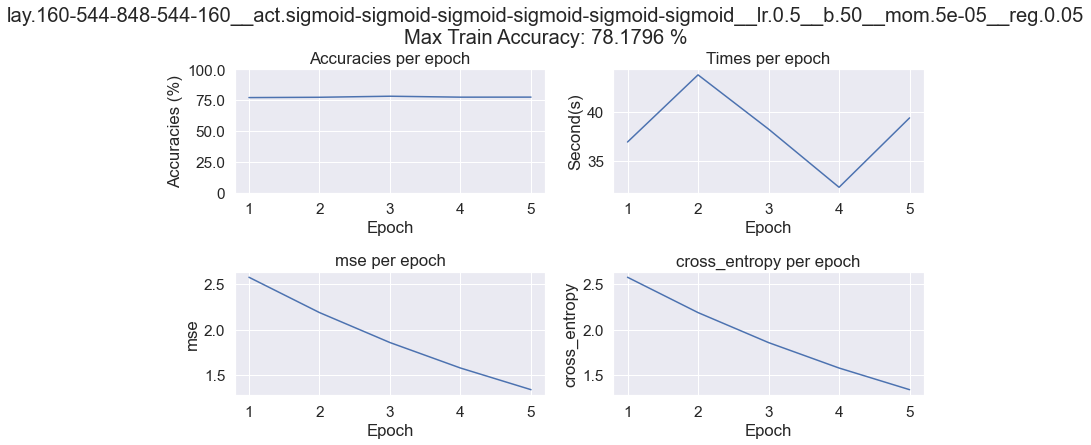

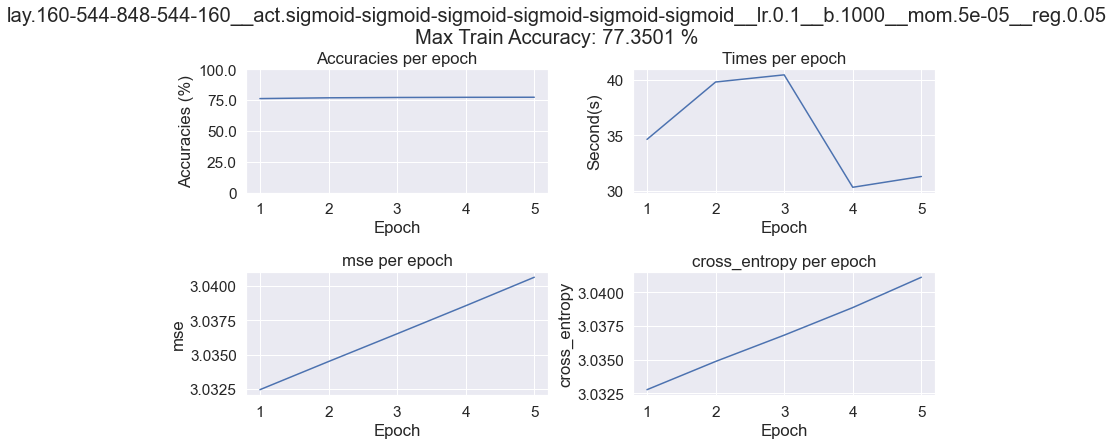

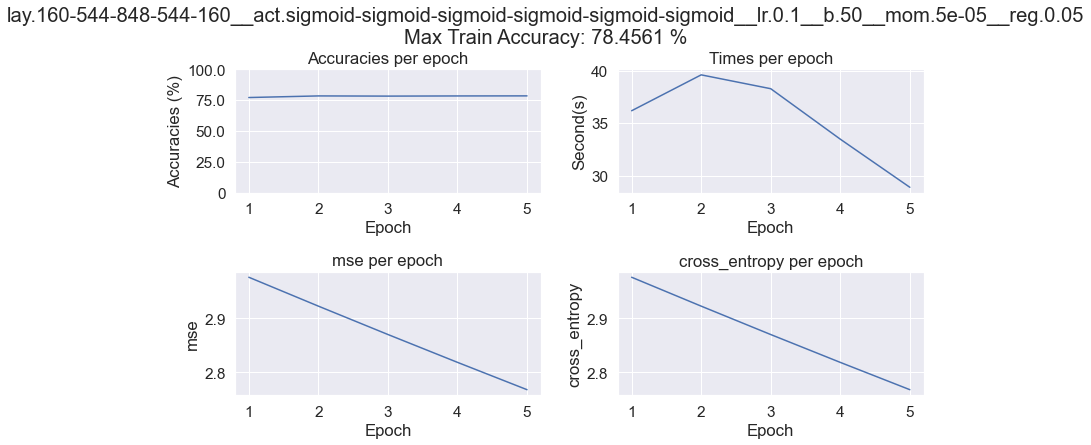

In [84]:
for name in mlp_losses: 
  models.test_and_plot_bpnn(title=name, 
                       accuracies=mlp_accuracies[name], 
                       times=mlp_times[name],
                       losses=mlp_losses[name], subsample=1)

### 5. Tune Logistic Regression
#### Scratch Version

In [35]:
from project_libs.project import models

In [23]:
opt_params_pca = tune_scratch_log_reg(xtrain=X_train_PCA.iloc[:,0:-1],
                                      ytrain=y_train, xval=X_val_PCA.iloc[:,0:-1],
                                      yval=y_val, passes = 10)

The optimal threshold and learning rate:  [0.5499999999999999, 0.5] 
 The highest Accuracy:  0.7821278478212785 Tuning Logistic Regression Scratch took:  140.2945704460144 s


In [36]:
opt_params = tune_scratch_log_reg(xtrain=X_train, ytrain=y_train,
                                  xval=X_val, yval=y_val, passes = 5)

The optimal threshold and learning rate:  [0.95, 0.5] 
 The highest Accuracy:  0.7758239327582394 Tuning Logistic Regression Scratch took:  950.2308812141418 s


### 6. Tune AdaBoost

In [ ]:
parameters = {'n_estimators': [100, 200, 400, 800], 
              'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0]
             }

print("======================================")
print(f"\033[1mAdaBoost Tuning Results \033[0m")
print("======================================")

for n in parameters['n_estimators']:
    for lr in parameters['learning_rate']:
            clf_ab = models.AdaBoostClassifier(n_estimators=n, random_state=0, learning_rate=lr)
            clf_ab.fit(X_train_all, y_train)
            y_pred = clf_ab.predict(X_val_all)
            score = models.accuracy_score(y_val, y_pred)
            f1_s = models.f1_score(y_val, y_pred)
            print(f"n_estimators: {n} \t learning_rate: {lr} \t Accuracy: {round(100*score, 2)}% \t F1 Score: {round(f1_s, 2)}") 


## Training

### 1. Train KMeans

1. Kmeans Train Results 
Training size 72336
Kmeans training time 3.6847479343414307 secs
Epochs to converge: 23
Overall Accuracy: 77.31 %
F1-Score: 0.143
Class 0 accuracy: 97.9 %
Class 1 accuracy: 8.23 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |    54555    |     1169    | 55724 |
| Actual 1 |    15245    |     1367    | 16612 |
|  Total   |    69800    |     2536    | 72336 |
+----------+-------------+-------------+-------+
 
2. Kmeans Validation Results 
Validation size 9042
Overall Accuracy: 77.46 %
F1-Score: 0.142
Class 0 accuracy: 98.13 %
Class 1 accuracy: 8.09 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     6836    |     130     |  6966 |
| Actual 1 |     1908    |     168     |  2076 |
|  Total   |     8744    

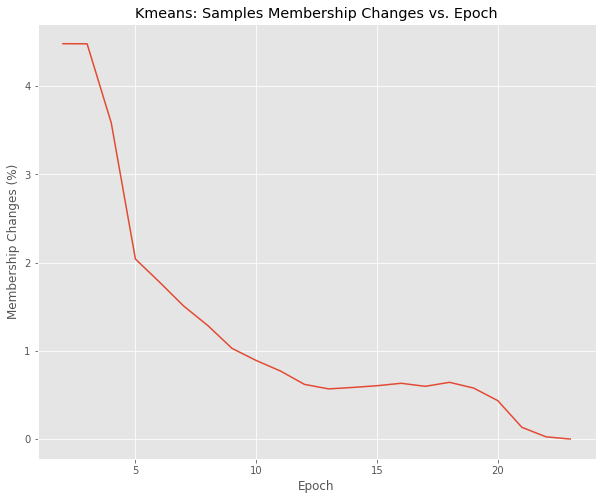

In [72]:
start_time = time()
km = models.kmeans(X_train_all, dist='cosine')
km.fit()
train_time = time() - start_time

print("======================================")
print(f"\033[1m1. Kmeans Train Results \033[0m")
print("======================================")
print(f"Training size {X_train_all.shape[0]}")
print(f"Kmeans training time {train_time} secs")
print(f"Epochs to converge: {km.epoch[-1]}")
y_pred = km.predict(X_train_all, y_train)
models.kmeans.classification_report(y_train, y_pred)

print(" ")
print("======================================")
print(f"\033[1m2. Kmeans Validation Results \033[0m")
print("======================================")
print(f"Validation size {X_val_all.shape[0]}")
y_pred = km.predict(X_val_all, y_val)
models.kmeans.classification_report(y_val, y_pred)
km.plot_membership_switches()

### 2. Train SVM

In [ ]:
start_time = time()
clf = models.SVC(C=1000, kernel='rbf', gamma=0.001)
clf.fit(X_train_km, y_train)
train_time = time() - start_time

print("======================================")
print(f"\033[1m1. SVM Train Results \033[0m")
print("======================================")
print(f"Training size {X_train_all.shape[0]}")
print(f"SVM training time {train_time} secs")
y_pred = clf.predict(X_train_km)
models.kmeans.classification_report(y_train, y_pred)

print(" ")
print("======================================")
print(f"\033[1m2. SVM Validation Results \033[0m")
print("======================================")
y_pred = clf.predict(X_val_all)
models.kmeans.classification_report(y_val, y_pred)


# ======================================
# 1. SVM Train Results on Full Data
# ======================================
# Training size 72336
# SVM training time 3753.5558609962463 secs
# Overall Accuracy: 85.24 %
# F1-Score: 0.588
# Class 0 accuracy: 96.96 %
# Class 1 accuracy: 45.91 %
# Confusion Matrix:
# +----------+-------------+-------------+-------+
# |          | Predicted 0 | Predicted 1 | Total |
# +----------+-------------+-------------+-------+
# | Actual 0 |    54031    |     1693    | 55724 |
# | Actual 1 |     8986    |     7626    | 16612 |
# |  Total   |    63017    |     9319    | 72336 |
# +----------+-------------+-------------+-------+
 
# ======================================
# 2. SVM Validation Results on Full Data 
# ======================================
# Overall Accuracy: 84.49 %
# F1-Score: 0.57
# Class 0 accuracy: 96.35 %
# Class 1 accuracy: 44.7 %
# Confusion Matrix:
# +----------+-------------+-------------+-------+
# |          | Predicted 0 | Predicted 1 | Total |
# +----------+-------------+-------------+-------+
# | Actual 0 |     6712    |     254     |  6966 |
# | Actual 1 |     1148    |     928     |  2076 |
# |  Total   |     7860    |     1182    |  9042 |
# +----------+-------------+-------------+-------+


### 3. Train Bayesian

In [20]:
# Set parameters
bayesian_case_tr = models.BayesianCase(train_x=X_train_PCA_TVT_np, train_y=y_train_np, 
                                        test_x=X_test_PCA_TVT_np, test_y=y_test_np)
bayesian_case_tr.fit()

### 4. Train BPNN¶


In [ ]:
# Func to create string from list (for creating names)
def join_lst(lst): return '-'.join([str(el) for el in lst])
# Chosen Hyperparams
loss_functions = ['mse', 'cross_entropy']
symmetric_weights = True
shuffle = True
seed = 3
early_stopping = {"max_accuracy": 0.99, 'wait': 2}
debug = {'epochs': 1, 'batches': 10**10,
         'ff': False, 'bp': False, 'w': False, 'metrics': False}
mlp_models = {}
mlp_accuracies = {}
mlp_losses = {}
mlp_times = {}
# Hyperparams to test
b_size = 50
max_epochs = 30
reg = 0.05
mom = 0.00005
lr = 0.1
lay = [160, 544, 848, 544, 160]
act=  ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid"]
name = f"lay.{join_lst(lay)}__act.{join_lst(act)}__lr.{lr}__b.{b_size}__mom.{mom}__reg.{reg}"
save_data = True
# Train on train set
logger.info(f"Start Training")    
mlp_train_model, mlp_train_accuracies, mlp_train_losses, mlp_train_times = \
    models.train_bpnn(name, X_train_PCA_TVT_np.copy(), y_train_onehot_np.copy(), lay, act,
                              loss_functions, lr, mom, b_size, early_stopping,
                              max_epochs, reg, shuffle, symmetric_weights, seed, debug, save_data)


2021-12-07 14:47:53 Models       INFO     Start Training

2021-12-07 14:47:53 Models       INFO     Training lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.1__b.50__mom.5e-05__reg.0.05 dataset..
2021-12-07 14:47:53 Models       INFO     [15, 160, 544, 848, 544, 160, 2]
2021-12-07 14:47:53 Models       INFO     Epoch: 1


### 5. Train Logistic Regression 
##### Scratch Version PCA

### 6. Train AdaBoost

In [73]:
start_time = time()
clf_ab = models.AdaBoostClassifier(n_estimators=800, random_state=0, learning_rate=0.5)
clf_ab.fit(X_train_PCA_TVT, y_train)
train_time = time() - start_time
        
print("======================================")
print(f"\033[1m1. AdaBoost Train Results \033[0m")
print("======================================")
print(f"Training size {X_train_PCA_TVT.shape[0]}")
print(f"AdaBoost training time {train_time} secs")
y_pred = clf_ab.predict(X_train_PCA_TVT)
models.kmeans.classification_report(y_train, y_pred)

print(" ")
print("======================================")
print(f"\033[1m2. AdaBoost Validation Results \033[0m")
print("======================================")
y_pred = clf_ab.predict(X_val_PCA_TVT)
models.kmeans.classification_report(y_val, y_pred)


# ===================================================
# 1. AdaBoost Train Results on PCA Data n=800, lr=0.5
# ===================================================
# Training size 72336
# AdaBoost training time 100.17422103881836 secs
# Overall Accuracy: 82.24 %
# F1-Score: 0.53
# Class 0 accuracy: 93.78 %
# Class 1 accuracy: 43.53 %
# Confusion Matrix:
# +----------+-------------+-------------+-------+
# |          | Predicted 0 | Predicted 1 | Total |
# +----------+-------------+-------------+-------+
# | Actual 0 |    52259    |     3465    | 55724 |
# | Actual 1 |     9380    |     7232    | 16612 |
# |  Total   |    61639    |    10697    | 72336 |
# +----------+-------------+-------------+-------+
 
# ===========================================
# 2. AdaBoost Validation Results on PCA data
# ===========================================
# Overall Accuracy: 82.26 %
# F1-Score: 0.528
# Class 0 accuracy: 93.9 %
# Class 1 accuracy: 43.21 %
# Confusion Matrix:
# +----------+-------------+-------------+-------+
# |          | Predicted 0 | Predicted 1 | Total |
# +----------+-------------+-------------+-------+
# | Actual 0 |     6541    |     425     |  6966 |
# | Actual 1 |     1179    |     897     |  2076 |
# |  Total   |     7720    |     1322    |  9042 |
# +----------+-------------+-------------+-------+


# ====================================================
# 1. AdaBoost Train Results on Full Data n=800, lr=1.0
# ====================================================
# Training size 72336
# AdaBoost training time 65.59841990470886 secs
# Overall Accuracy: 84.31 %
# F1-Score: 0.622
# Class 0 accuracy: 92.72 %
# Class 1 accuracy: 56.12 %
# Confusion Matrix:
# +----------+-------------+-------------+-------+
# |          | Predicted 0 | Predicted 1 | Total |
# +----------+-------------+-------------+-------+
# | Actual 0 |    51665    |     4059    | 55724 |
# | Actual 1 |     7290    |     9322    | 16612 |
# |  Total   |    58955    |    13381    | 72336 |
# +----------+-------------+-------------+-------+
 
# ======================================
# 2. AdaBoost Validation Results 
# ======================================
# Overall Accuracy: 84.21 %
# F1-Score: 0.616
# Class 0 accuracy: 92.84 %
# Class 1 accuracy: 55.25 %
# Confusion Matrix:
# +----------+-------------+-------------+-------+
# |          | Predicted 0 | Predicted 1 | Total |
# +----------+-------------+-------------+-------+
# | Actual 0 |     6467    |     499     |  6966 |
# | Actual 1 |     929     |     1147    |  2076 |
# |  Total   |     7396    |     1646    |  9042 |
# +----------+-------------+-------------+-------+

1. AdaBoost Train Results 
Training size 72336
AdaBoost training time 96.95302605628967 secs
Overall Accuracy: 82.24 %
F1-Score: 0.53
Class 0 accuracy: 93.78 %
Class 1 accuracy: 43.53 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |    52259    |     3465    | 55724 |
| Actual 1 |     9380    |     7232    | 16612 |
|  Total   |    61639    |    10697    | 72336 |
+----------+-------------+-------------+-------+
 
2. AdaBoost Validation Results 
Overall Accuracy: 82.26 %
F1-Score: 0.528
Class 0 accuracy: 93.9 %
Class 1 accuracy: 43.21 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     6541    |     425     |  6966 |
| Actual 1 |     1179    |     897     |  2076 |
|  Total   |     7720    |     1322    |  9042 |
+----------+--

In [50]:
start_train_LR_scratch = time()

LR_scratch_pca = Log_Reg(learning_rate=opt_params_pca[1], iters=500)
LR_scratch_pca.fit(X_train_PCA, y_train)

stop_train_LR_scratch = time()

time_train_LR_scratch = stop_train_LR_scratch - start_train_LR_scratch

print('The optimal bias: ', LR_scratch_pca.bias, '\n\n', 'The optimal weights: ', LR_scratch_pca.weights,
     '\n\n', 'Training Log. Reg. Scratch took: ', time_train_LR_scratch, 's')

The optimal bias:  1.134945203591967 

 The optimal weights:  [-4.47652279e+01 -8.06629727e+01  2.92546258e+00 -1.68694725e+01
  1.43140392e+01 -4.20021719e+00 -4.47004346e+00 -1.08421777e+01
  5.42047547e+00 -1.97257955e+01 -4.10226989e+00  2.47010544e+01
  8.00984273e-01  5.35860862e+00  1.12288112e+01  4.67743448e-03] 

 Training Log. Reg. Scratch took:  1.612163782119751 s


##### Scratch Version Regular

In [ ]:
start_train_LR_scratch = time()

LR_scratch = Log_Reg(learning_rate=opt_params[1], iters=500)
LR_scratch.fit(X_train, y_train)

stop_train_LR_scratch = time()

time_train_LR_scratch = stop_train_LR_scratch - start_train_LR_scratch

print('The optimal bias: ', LR_scratch.bias, '\n\n', 'The optimal weights: ', LR_scratch.weights,
     '\n\n', 'Training Log. Reg. Scratch took: ', time_train_LR_scratch, 's')

The optimal bias:  1.2169647475597132 

 The optimal weights:  [-1.40559319e+00 -4.04710722e+00  1.43565686e+01  1.27710333e+00
 -2.10468418e+00  3.42061409e+01  4.80480924e+00  2.06371539e+00
 -1.85516982e+00  8.25440762e+00  4.90989748e+00 -1.69871365e+00
 -1.35287227e+00  3.92532766e+00  9.27918244e-01  1.38615212e-02
  1.05803702e-01  6.04687601e+00 -1.80572851e-01  1.17569049e+00
 -4.69894331e-01  1.38615212e-02  0.00000000e+00  2.62759733e+00
 -7.22503127e+00 -6.97464228e+00 -5.80123158e+01  2.25840590e+01
  7.48610216e+00 -2.70480842e+01  1.20830729e+00 -1.08351221e+00
 -1.92990733e+00  2.25840590e+01 -1.21738497e-03 -4.02768837e-02
  7.52637904e+00 -2.70480842e+01 -1.92990733e+00 -1.48806492e-03
  1.20830729e+00 -1.08080676e+00  4.53750566e-02 -3.29250549e-02
  1.03227395e-01  8.88391024e-01  7.64423044e-01  9.25784378e-01
 -3.23213714e-01 -4.21348294e-01 -1.00721326e+00 -9.79492015e-01
  2.16763993e-02 -3.47150437e-01 -1.53443359e+00 -1.76044443e+00
 -1.30161041e+00  3.8142719

## Testing

### 1. Test KMeans

In [75]:
# Prepare Test Data
X_test_PCA_TVT = X_test_PCA.loc[:, X_test_PCA.columns!='PCA_15'].copy()
X_test_PCA_TVT.reset_index(drop=True)
X_test_PCA_TVT = X_test_PCA_TVT.to_numpy()

X_test_all = X_test.copy()
X_test_all.reset_index(drop=True)
X_test_all = X_test_all.to_numpy()

print("======================================")
print(f"\033[1m1. Kmeans Test Results \033[0m")
print("======================================")
start_time = time()
y_pred = km.predict(X_test_all, y_test)
test_time = time() - start_time
print(f"Test data size {X_test_all.shape[0]}")
print(f"Kmeans prediction time {test_time} secs")
models.kmeans.classification_report(y_test, y_pred)

print("")
## Compare results from SKLearn's Kmeans
print("======================================")
print(f"\033[1m2. Sklearn Kmeans Test Results \033[0m")
print("======================================")
sk_km = models.KMeans(n_clusters=2, random_state=0).fit(X_train_all)
y_pred = sk_km.predict(X_test_all)
models.kmeans.classification_report(y_test, y_pred)

1. Kmeans Test Results 
Test data size 9043
Kmeans prediction time 0.004664897918701172 secs
Overall Accuracy: 77.66 %
F1-Score: 0.16
Class 0 accuracy: 98.05 %
Class 1 accuracy: 9.29 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     6830    |     136     |  6966 |
| Actual 1 |     1884    |     193     |  2077 |
|  Total   |     8714    |     329     |  9043 |
+----------+-------------+-------------+-------+

2. Sklearn Kmeans Test Results 
Overall Accuracy: 42.44 %
F1-Score: 0.32
Class 0 accuracy: 37.53 %
Class 1 accuracy: 58.93 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     2614    |     4352    |  6966 |
| Actual 1 |     853     |     1224    |  2077 |
|  Total   |     3467    |     5576    |  9043 |
+----------+----

### 2. Test SVM

In [ ]:
print("======================================")
print(f"\033[1mSVM Test Results \033[0m")
print("======================================")
start_time = time()
y_pred = clf.predict(X_test_all)
test_time = time() - start_time
print(f"Test data size {X_test_all.shape[0]}")
print(f"SVM prediction time {test_time} secs")
models.kmeans.classification_report(y_test, y_pred)

# ======================================
# SVM Test Results on Full Data
# ======================================
# Test data size 9043
# SVM prediction time 29.924061059951782 secs
# Overall Accuracy: 84.0 %
# F1-Score: 0.548
# Class 0 accuracy: 96.44 %
# Class 1 accuracy: 42.27 %
# Confusion Matrix:
# +----------+-------------+-------------+-------+
# |          | Predicted 0 | Predicted 1 | Total |
# +----------+-------------+-------------+-------+
# | Actual 0 |     6718    |     248     |  6966 |
# | Actual 1 |     1199    |     878     |  2077 |
# |  Total   |     7917    |     1126    |  9043 |
# +----------+-------------+-------------+-------+


### 3. Test Bayesian

In [25]:
### -- Case 1 -- ###
bay_case = 'euclidean'
bay_priors = (0.9848 , 0.0152)
bayesian_case_tr.predict(mtype=bay_case, priors=bay_priors, save_data=True)
# Retrieve statisics
accuracy, classwise_accuracy, prediction_time = bayesian_case_tr.get_statistics(bay_case)
tp, fn, fp, tn = bayesian_case_tr.get_confusion_matrix(bay_case)
bay_results = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
bayesian_case_tr.print_statistics(name="Case 1", mtype=bay_case)
### -- Case 2 -- ###
bay_case = 'mahalanobis'
bay_priors = (0.7558 , 0.2442)
bayesian_case_tr.predict(mtype=bay_case, priors=bay_priors, save_data=True)
# Retrieve statisics
accuracy, classwise_accuracy, prediction_time = bayesian_case_tr.get_statistics(bay_case)
tp, fn, fp, tn = bayesian_case_tr.get_confusion_matrix(bay_case)
bay_results = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
bayesian_case_tr.print_statistics(name="Case 2", mtype=bay_case)
### -- Case 3 -- ###
bay_case = 'quadratic'
bay_priors = (0.9924 , 0.0076)
bayesian_case_tr.predict(mtype=bay_case, priors=bay_priors, save_data=True)
# Retrieve statisics
accuracy, classwise_accuracy, prediction_time = bayesian_case_tr.get_statistics(bay_case)
tp, fn, fp, tn = bayesian_case_tr.get_confusion_matrix(bay_case)
bay_results = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
bayesian_case_tr.print_statistics(name="Case 3", mtype=bay_case)


2021-12-08 12:55:09 Models       INFO     Parametric Model (case: euclidean) for the Case 1 dataset
2021-12-08 12:55:09 Models       INFO     The overall accuracy is: 0.7716
2021-12-08 12:55:09 Models       INFO     The classwise accuracies are: [0.96152741889176, 0.1348098218584497]
2021-12-08 12:55:09 Models       INFO     Total time: 0.1088 sec(s)
2021-12-08 12:55:09 Models       INFO     |               |   Positive    |   Negative    |
2021-12-08 12:55:09 Models       INFO     |   Positive    |     6698      |      268      |
2021-12-08 12:55:09 Models       INFO     |   Negative    |     1797      |      280      |
2021-12-08 12:55:12 Models       INFO     Parametric Model (case: mahalanobis) for the Case 2 dataset
2021-12-08 12:55:12 Models       INFO     The overall accuracy is: 0.8076
2021-12-08 12:55:12 Models       INFO     The classwise accuracies are: [0.9253517082974447, 0.4126143476167549]
2021-12-08 12:55:12 Models       INFO     Total time: 2.5926 sec(s)
2021-12-08 12:

### 4. Test BPNN

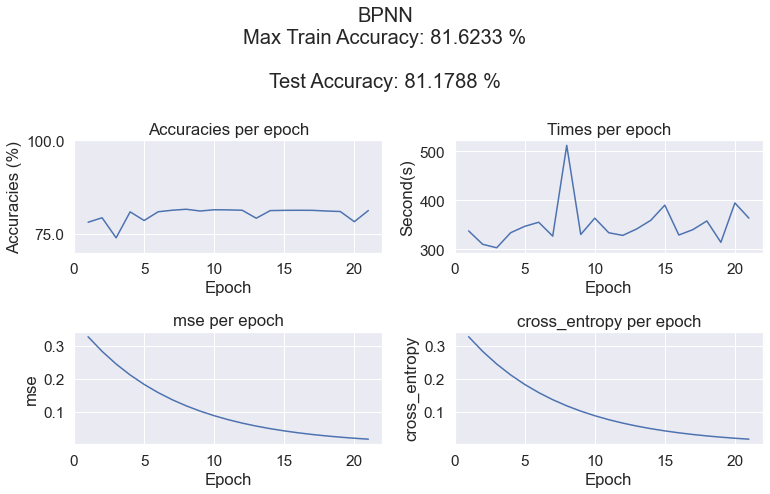

In [108]:
mlp_model_loaded, mlp_accuracies_loaded, mlp_losses_loaded, mlp_times_loaded = \
    models.MultiLayerPerceptron.load_model_instance(epoch=21)
models.test_and_plot_bpnn(title="BPNN",
                          model=mlp_model_loaded,
                          test_set=X_test_PCA_TVT_np.copy(), 
                          one_hot_targets = y_test_onehot_np.copy(),
                          accuracies=mlp_accuracies_loaded,
                          times=mlp_times_loaded,
                          losses=mlp_losses_loaded,
                          subsample=1, min_acc=0.7, save_predictions=True)

### 5. Test AdaBoost

In [76]:
print("======================================")
print(f"\033[1mAdaBoost Test Results \033[0m")
print("======================================")
start_time = time()
y_pred = clf_ab.predict(X_test_PCA_TVT)
test_time = time() - start_time
print(f"Test data size {X_test_PCA_TVT.shape[0]}")
print(f"SVM prediction time {test_time} secs")
models.kmeans.classification_report(y_test, y_pred)
print(models.classification_report(y_test, y_pred))

# ======================================
# AdaBoost Test Results full Data
# ======================================
# Test data size 9043
# SVM prediction time 1.191047191619873 secs
# Overall Accuracy: 84.1 %
# F1-Score: 0.613
# Class 0 accuracy: 92.84 %
# Class 1 accuracy: 54.79 %
# Confusion Matrix:
# +----------+-------------+-------------+-------+
# |          | Predicted 0 | Predicted 1 | Total |
# +----------+-------------+-------------+-------+
# | Actual 0 |     6467    |     499     |  6966 |
# | Actual 1 |     939     |     1138    |  2077 |
# |  Total   |     7406    |     1637    |  9043 |
# +----------+-------------+-------------+-------+

#               precision    recall  f1-score   support

#            0       0.87      0.93      0.90      6966
#            1       0.70      0.55      0.61      2077

#     accuracy                           0.84      9043
#    macro avg       0.78      0.74      0.76      9043
# weighted avg       0.83      0.84      0.83      9043


# ======================================
# AdaBoost Test Results full data
# ======================================
# Test data size 9043
# SVM prediction time 0.440446138381958 secs
# Overall Accuracy: 81.25 %
# F1-Score: 0.499
# Class 0 accuracy: 93.35 %
# Class 1 accuracy: 40.64 %
# Confusion Matrix:
# +----------+-------------+-------------+-------+
# |          | Predicted 0 | Predicted 1 | Total |
# +----------+-------------+-------------+-------+
# | Actual 0 |     6503    |     463     |  6966 |
# | Actual 1 |     1233    |     844     |  2077 |
# |  Total   |     7736    |     1307    |  9043 |
# +----------+-------------+-------------+-------+
#               precision    recall  f1-score   support

#            0       0.84      0.93      0.88      6966
#            1       0.65      0.41      0.50      2077

#     accuracy                           0.81      9043
#    macro avg       0.74      0.67      0.69      9043
# weighted avg       0.80      0.81      0.80      9043



AdaBoost Test Results 
Test data size 9043
SVM prediction time 0.44203782081604004 secs
Overall Accuracy: 81.25 %
F1-Score: 0.499
Class 0 accuracy: 93.35 %
Class 1 accuracy: 40.64 %
Confusion Matrix:
+----------+-------------+-------------+-------+
|          | Predicted 0 | Predicted 1 | Total |
+----------+-------------+-------------+-------+
| Actual 0 |     6503    |     463     |  6966 |
| Actual 1 |     1233    |     844     |  2077 |
|  Total   |     7736    |     1307    |  9043 |
+----------+-------------+-------------+-------+
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6966
           1       0.65      0.41      0.50      2077

    accuracy                           0.81      9043
   macro avg       0.74      0.67      0.69      9043
weighted avg       0.80      0.81      0.80      9043



### 6. Test Logistic Regression 
##### Scratch Version

In [58]:
start_LR_test_scratch = time()

preds_LR_scratch_pca = LR_scratch_pca.predict(X_test_PCA, threshold=opt_params_pca[0])

stop_LR_test_scratch = time()

time_LR_test_scratch = stop_LR_test_scratch - start_LR_test_scratch

cm_LR_scratch = confusion_matrix(y_test, preds_LR_scratch_pca)
models.evaluate_cm(cm_LR_scratch, 'PRINT')   


accuracy:  0.7729735707176821 precision:  0.6621621621621622 sensitivity:  0.023591718825228696 specificity:  0.9964111398219926 f1_score:  0.04556020455602046


In [59]:
conf_mat1 = PrettyTable(['Scratch PCA','Predicted Pos.', 'Predicted Neg.'])
conf_mat1.add_row(['Actual Postive', cm_LR_scratch[1,1], cm_LR_scratch[1,0]])
conf_mat1.add_row(['Actual Negative', cm_LR_scratch[0,1], cm_LR_scratch[0,0]])

print(conf_mat1)

+-----------------+----------------+----------------+
|   Scratch PCA   | Predicted Pos. | Predicted Neg. |
+-----------------+----------------+----------------+
|  Actual Postive |       49       |      2028      |
| Actual Negative |       25       |      6941      |
+-----------------+----------------+----------------+


In [ ]:
start_LR_test_scratch = time()

preds_LR_scratch = LR_scratch.predict(X_test, threshold=opt_params[0])

stop_LR_test_scratch = time()

time_LR_test_scratch = stop_LR_test_scratch - start_LR_test_scratch

cm_LR_scratch = confusion_matrix(y_test, preds_LR_scratch)
models.evaluate_cm(cm_LR_scratch, 'PRINT') 


accuracy:  0.7715359946920269 precision:  0.5030916245081506 sensitivity:  0.4309099662975445 specificity:  0.873097904105656 f1_score:  0.46421161825726137


In [61]:
conf_mat1 = PrettyTable(['Scratch Regular','Predicted Pos.', 'Predicted Neg.'])
conf_mat1.add_row(['Actual Postive', cm_LR_scratch[1,1], cm_LR_scratch[1,0]])
conf_mat1.add_row(['Actual Negative', cm_LR_scratch[0,1], cm_LR_scratch[0,0]])

print(conf_mat1)

+-----------------+----------------+----------------+
| Scratch Regular | Predicted Pos. | Predicted Neg. |
+-----------------+----------------+----------------+
|  Actual Postive |      895       |      1182      |
| Actual Negative |      884       |      6082      |
+-----------------+----------------+----------------+


##### SKLearn Version   Tune\Train\Test    PCA Variables

In [29]:
skl_pca_results = tune_SKLearn_LR(X_train = X_train_PCA.iloc[:,0:-1], X_val = X_val_PCA.iloc[:,0:-1],
                                  X_test=X_test_PCA.iloc[:,0:-1], y_train=y_train, y_val=y_val,
                                  y_test=y_test, param = 'pca')


 Logistic Regression Tuning Results on PCA Data
LOGISTIC REGRESSION BEST MODEL BASED ON VALIDATION:


+------------------+----------+-------------+-------------+-----------+------------------+
| Time to Tune (s) | Accuracy | Sensitivity | Specificity | Precision | F1 Score (macro) |
+------------------+----------+-------------+-------------+-----------+------------------+
|      148.86      |   0.81   |     0.36    |     0.94    |    0.65   |       0.67       |
+------------------+----------+-------------+-------------+-----------+------------------+

The best parameters are:  {'warm_start': False, 'solver': 'lbfgs', 'penalty': 'none', 'multi_class': 'multinomial', 'fit_intercept': True, 'dual': False, 'C': 0.7431578947368421}


##### Regular Variables

In [25]:
skl_reg_results = tune_SKLearn_LR(X_train = X_train, X_val = X_val,
                                  X_test=X_test, y_train=y_train, y_val=y_val,
                                  y_test=y_test, param = 'full')


 Logistic Regression Tuning Results on Full Data
LOGISTIC REGRESSION BEST MODEL BASED ON VALIDATION:


+------------------+----------+-------------+-------------+-----------+------------------+
| Time to Tune (s) | Accuracy | Sensitivity | Specificity | Precision | F1 Score (macro) |
+------------------+----------+-------------+-------------+-----------+------------------+
|      500.99      |   0.82   |     0.41    |     0.94    |    0.67   |       0.7        |
+------------------+----------+-------------+-------------+-----------+------------------+

The best parameters are:  {'warm_start': False, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'auto', 'fit_intercept': False, 'dual': False, 'C': 1.4763157894736842}


## Plots

In [ ]:
from project_libs.project import plotter as pl

### 1. Plot Delay Duration by Severity

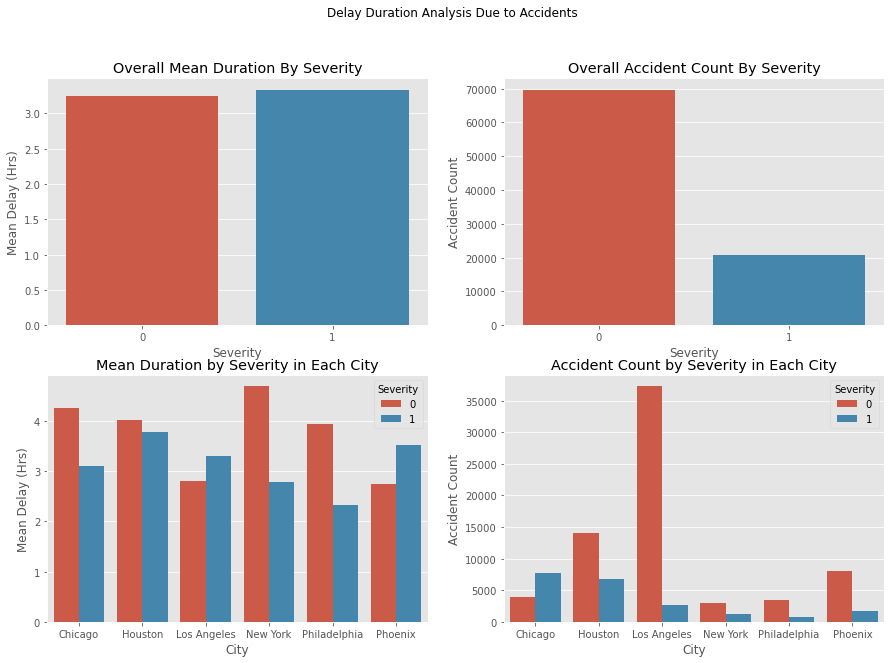

In [61]:
X_raw_plot = X_raw.copy()
X_raw_plot = pl.transform_data_for_plotting(X_raw_plot)
pl.plot_delay_duration(X_raw_plot)

### 2. Plot Mean Distance by Severity

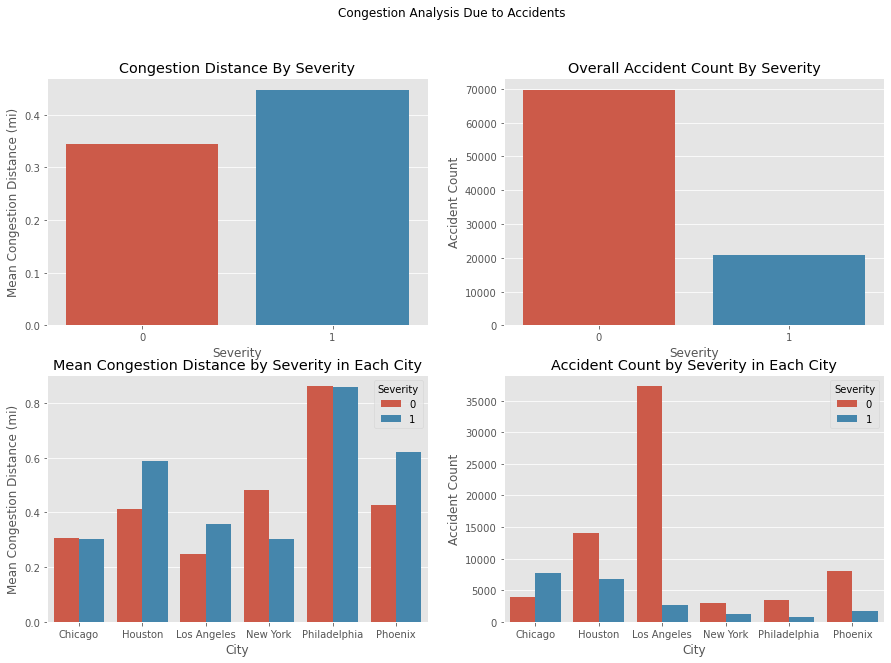

In [62]:
pl.plot_mean_distance(X_raw_plot)

### 3. Plot Accident Distribution by Day & Night

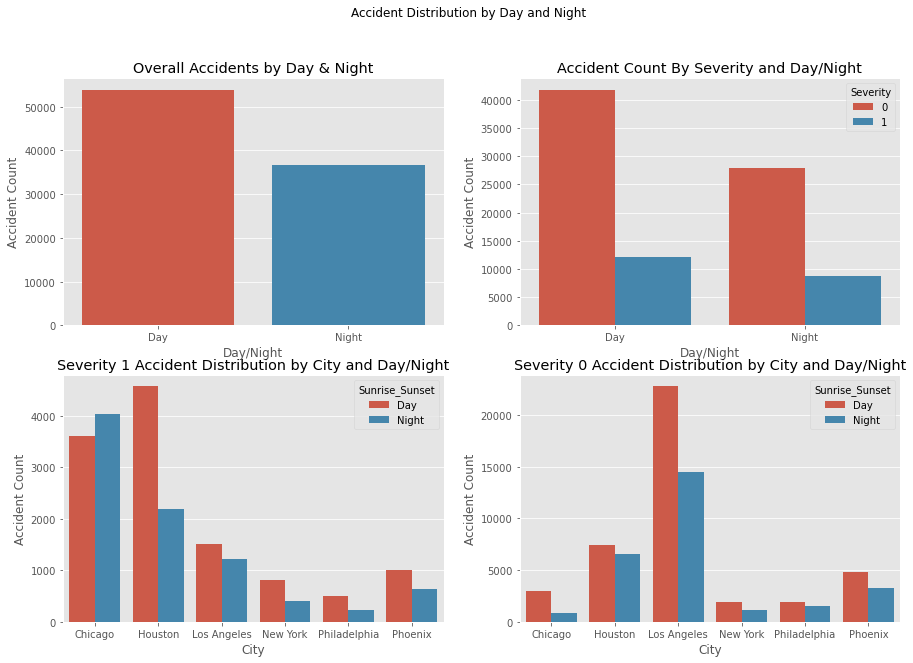

In [63]:
pl.plot_day_night(X_raw_plot)

### 4. Effect of Weather Condition

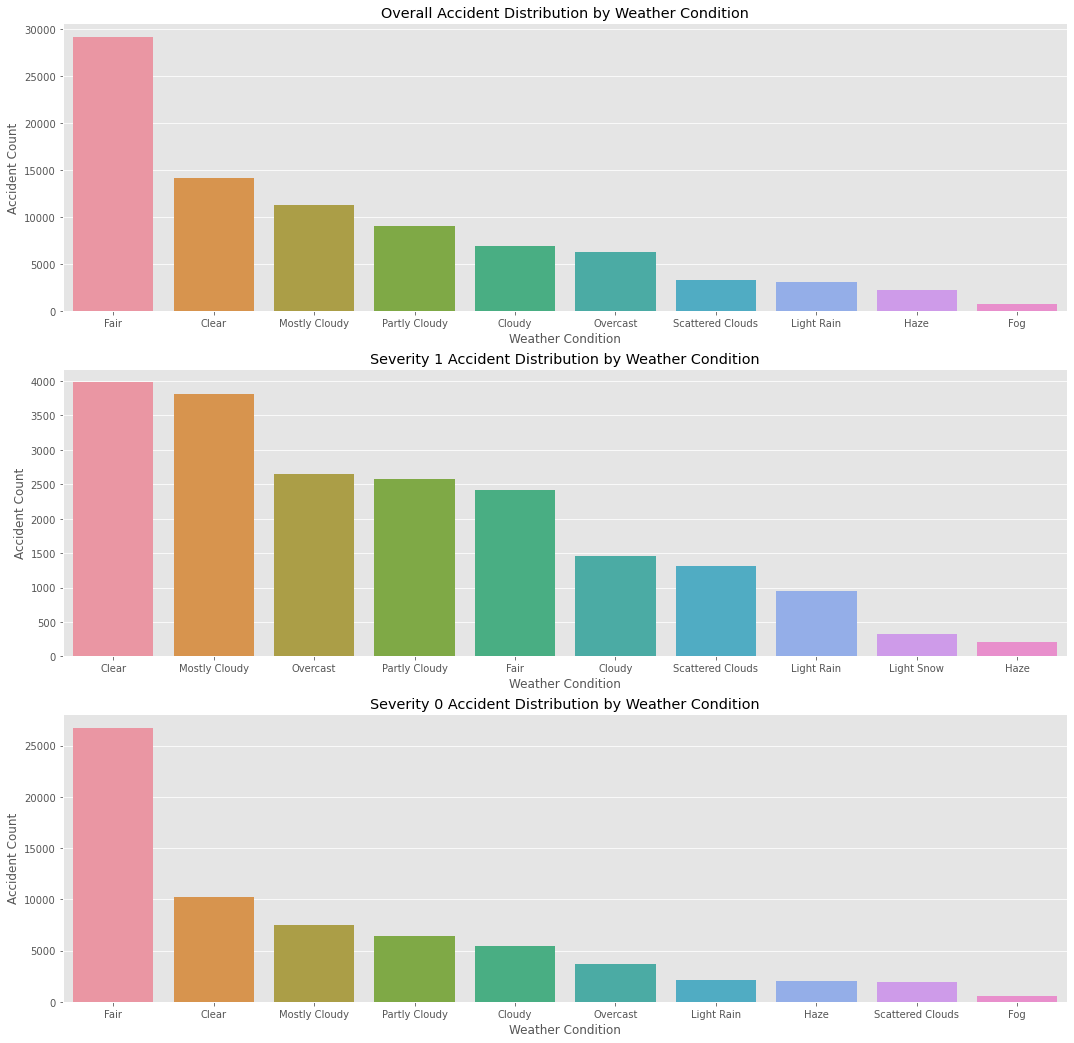

In [64]:
pl.plot_weather_conditions(X_raw_plot)

#### (Optional) Store model results

In [30]:
import pickle

# logistic_regression_results.pkl: SKLearn with pca, SKL without pca, scratch pca, scratch without pca
# each component is a tuple with the first element = model and the second = the predicted values. 

with open('logistic_regression_results', 'wb') as f:
    pickle.dump([skl_pca_results[1], skl_reg_results[1]], f)
